In [ ]:
ROOT_DIR = '/content/gdrive/MyDrive/imagedataset'

In [ ]:

!pip install dlib
!pip install face_recognition
!pip install opencv-python
!pip install ultralytics


0: 448x640 1 face, 100.9ms
Speed: 6.8ms preprocess, 100.9ms inference, 505.9ms postprocess per image at shape (1, 3, 448, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face'}
orig_img: array([[[248, 233, 230],
        [248, 233, 230],
        [248, 233, 230],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 233, 230],
        [248, 233, 230],
        [248, 233, 230],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 233, 230],
        [248, 233, 230],
        [248, 233, 230],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 34,  58,  58],
        [ 40,  64,  62],
        [ 43,  68,  64],
        ...,
        [ 29,  36,  45],
        [ 30,  37,  46],
        [ 31,  38,  47]],

       [[ 32,  53,  54],
        [ 

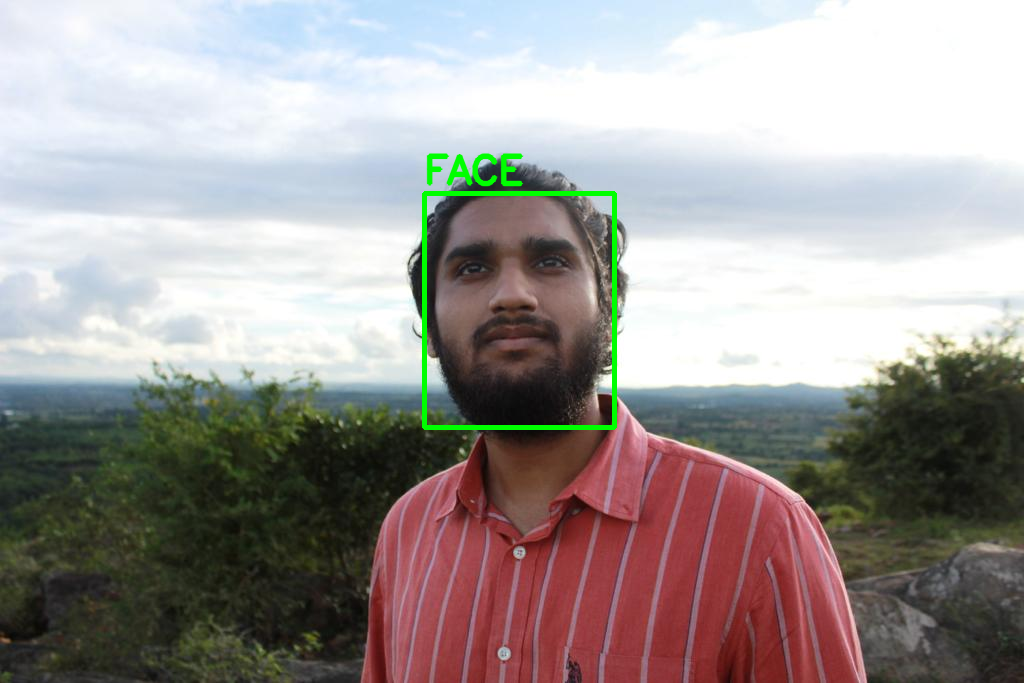

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow



IMAGES_DIR = os.path.join('.', 'images')  # Specify the directory containing your images
image_path = '/content/krishna.jpeg'  # Specify the path to your image
 # Specify the path to your image

# Load the image
frame = cv2.imread(image_path)

# Get the image dimensions
H, W, _ = frame.shape

# Output image path
output_image_path = '{}_out.jpg'.format(os.path.splitext(image_path)[0])

# Model path
model_path = os.path.join('/content/drive/MyDrive/imagedatasets/detect/train/weights', 'last.pt')

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")


# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

# Run detection on the image
results = model(frame)[0]
print(results)
print("Class names:", results.names)


# Process the results and draw bounding boxes
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
        cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
        print("Hey, bounding box found!")

# Save the output image

cv2.imwrite(output_image_path, frame)

# Display the output image
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 640x448 1 face, 72.1ms
Speed: 2.1ms preprocess, 72.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face'}
orig_img: array([[[ 89, 115, 102],
        [113, 133, 120],
        [148, 156, 145],
        ...,
        [ 30, 108, 107],
        [ 39, 124, 120],
        [ 37, 127, 121]],

       [[ 84, 108, 100],
        [100, 119, 110],
        [124, 133, 123],
        ...,
        [ 33, 111, 110],
        [ 36, 121, 117],
        [ 34, 124, 118]],

       [[ 76,  98,  96],
        [ 80,  98,  97],
        [ 90, 101,  99],
        ...,
        [ 39, 117, 116],
        [ 33, 118, 114],
        [ 33, 121, 115]],

       ...,

       [[103, 129, 141],
        [ 99, 125, 137],
        [ 93, 119, 131],
        ...,
        [163, 153, 153],
        [166, 156, 156],
        [166, 156, 156]],

       [[107, 133, 145],
        [102, 

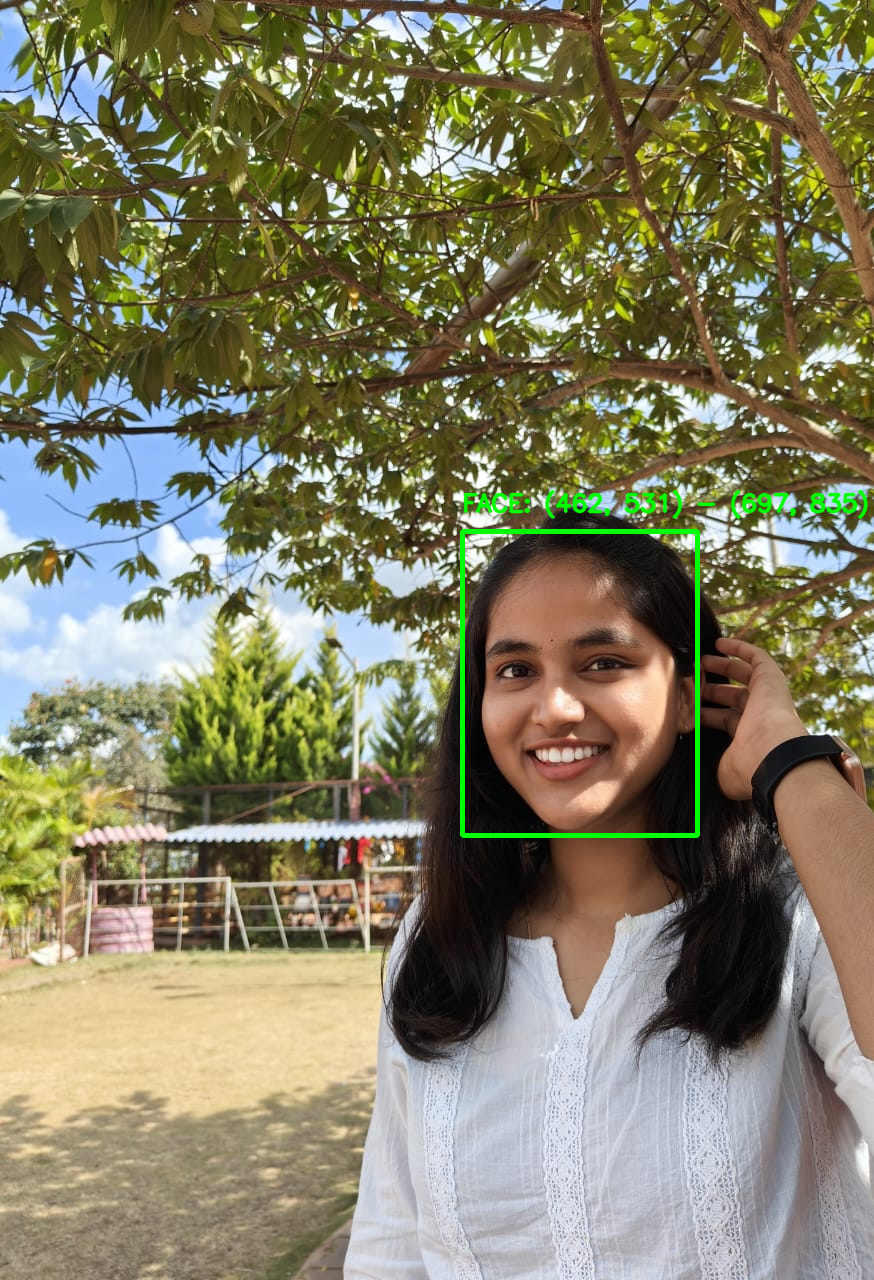

Encoded Faces: [array([   -0.18265,     0.11449,    0.077568,   -0.092645,    -0.17313,   -0.041312,   -0.058808,    -0.10628,     0.14094,    -0.13243,     0.20087,    -0.15579,    -0.21542,   0.0060368,   -0.071729,     0.20061,    -0.10966,    -0.15313,  -0.0020236,   -0.097022,    0.082328,    0.021368,   0.0050457,     0.06433,
          -0.15766,    -0.34603,    -0.13351,    -0.05336,   -0.065438,   -0.044278,   -0.017932,    0.062407,    -0.22987,   -0.070919,    0.032916,     0.11114,  -0.0023855,   0.0073748,     0.15158,   -0.019555,    -0.21492,  -0.0032395,     0.15172,      0.2339,     0.12374,    0.094813,   -0.027204,    -0.11971,
          0.065289,    -0.23508,    0.061589,     0.15062,    -0.00079,    0.051551,    0.040514,   -0.091046,    0.065683,     0.12597,    -0.16089,  0.00076661,      0.1012,   -0.068242,   -0.054475,    -0.06823,     0.29574,      0.1527,   -0.092772,    -0.14921,     0.11817,    -0.14252,   -0.074462,    0.079856,
          -0.11432,     -0.

In [ ]:

import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import face_recognition

IMAGES_DIR = os.path.join('.', 'images')  # Specify the directory containing your images
image_path = '/content/neha.jpeg'  # Specify the path to your image

# Load the image
frame = cv2.imread(image_path)

# Get the image dimensions
H, W, _ = frame.shape

# Output image path
output_image_path = '{}_out.jpg'.format(os.path.splitext(image_path)[0])

# Model path
model_path = os.path.join('/content/drive/MyDrive/imagedatasets/detect/train/weights', 'last.pt')

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

# List to store bounding box coordinates
bounding_boxes = []

# Run detection on the image
results = model(frame)[0]
print(results)
print("Class names:", results.names)

# Process the results and draw bounding boxes
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        # Draw a rectangle
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)

        # Add label with bounding box coordinates
        label = f"{results.names[int(class_id)].upper()}: ({int(x1)}, {int(y1)}) - ({int(x2)}, {int(y2)})"
        cv2.putText(frame, label, (int(x1), int(y1 - 20)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

        # Store bounding box coordinates in the list
        bounding_boxes.append((int(x1), int(y1), int(x2), int(y2)))

        print("Hey, bounding box found!")

# Save the output image
cv2.imwrite(output_image_path, frame)

# Display the output image
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Crop face regions using bounding box coordinates
for box in bounding_boxes:
    x1, y1, x2, y2 = box
    face_region = frame[y1:y2, x1:x2]

    # Convert BGR to RGB for face_recognition library
    face_region_rgb = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)

    # Perform face encoding
    encoded_faces = face_recognition.face_encodings(face_region_rgb)

    # Print or use the encoded_faces as needed
    print("Encoded Faces:", encoded_faces)


In [ ]:
import cv2
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
from datetime import datetime
import pickle
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
import base64
from PIL import Image
import io
from IPython.display import display, Image
import PIL.Image
from io import BytesIO
import IPython
import getpass

In [ ]:
!mkdir dataset
%cd dataset

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
mkdir: cannot create directory ‘datasets’: No such file or directory
[Errno 2] No such file or directory: 'datasets'
/content/datasets


In [ ]:
from google.colab import files

# Upload a single file
uploaded = files.upload()

Saving paku.jpeg to paku.jpeg


FileNotFoundError: ignored

In [ ]:
path = '/content/dataset/'

In [ ]:
images = []
classNames = []
mylist = os.listdir(path)
for cl in mylist:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

In [ ]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encoded_face = face_recognition.face_encodings(img)[0]
        encodeList.append(encoded_face)
    return encodeList
encoded_face_train = findEncodings(images)

In [ ]:
def markAttendance(name):
    with open('/content/Attendance.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            time = now.strftime('%I:%M:%S:%p')
            date = now.strftime('%d-%B-%Y')
            f.writelines(f'n{name}, {time}, {date}')

In [ ]:
def capture_image():
    display(Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for the Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    '''))
    data = eval_js('takePhoto({})'.format(0.8))
    binary_data = base64.b64decode(data.split(',')[1])
    image_array = np.frombuffer(binary_data, dtype=np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    return img

In [ ]:
import os
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import face_recognition
from IPython.display import display, Javascript, Image
import numpy as np
import base64
import getpass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


0: 480x640 1 face, 201.6ms
Speed: 1.6ms preprocess, 201.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face'}
orig_img: array([[[215, 238, 230],
        [215, 238, 230],
        [218, 237, 234],
        ...,
        [150, 162, 168],
        [150, 162, 168],
        [151, 163, 169]],

       [[215, 238, 230],
        [215, 238, 230],
        [218, 237, 234],
        ...,
        [149, 161, 167],
        [150, 162, 168],
        [150, 162, 168]],

       [[215, 238, 230],
        [216, 239, 231],
        [218, 237, 234],
        ...,
        [149, 161, 167],
        [149, 161, 167],
        [149, 161, 167]],

       ...,

       [[  9,  18,  27],
        [ 16,  26,  33],
        [ 31,  42,  46],
        ...,
        [ 76,  75,  79],
        [ 73,  72,  76],
        [ 70,  69,  73]],

       [[ 10,  20,  27],
        [ 17

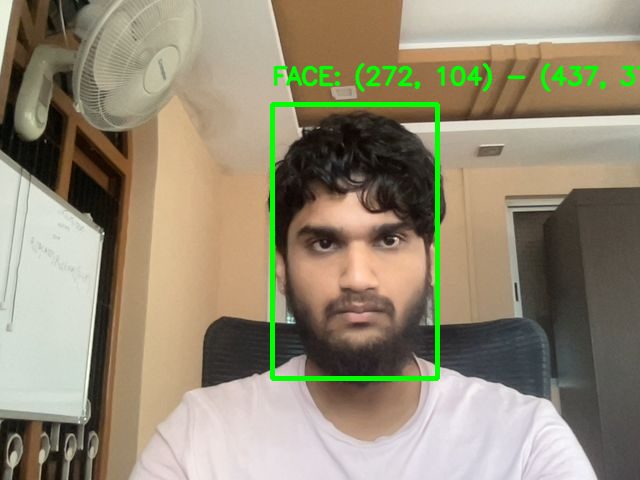

Encoded Faces: [array([   -0.19534,    0.078734,     0.06704,   -0.047157,   -0.041212,  -0.0091015,   -0.043176,     0.02071,     0.13404,    -0.10157,     0.18948,   -0.034264,     -0.1982,   -0.099434,   -0.051764,    0.091054,   -0.055912,    -0.11993,   -0.094072,    -0.13338,   -0.010447,    0.057943,    0.025723,   0.0037128,
          -0.17367,    -0.37887,   -0.044076,    -0.10538,   -0.083471,     -0.1154,   -0.014766,   -0.012634,    -0.19772,   -0.053277,    0.013683,     0.17763,    0.010029,    0.013827,     0.12486,    -0.01976,    -0.11006,   -0.047073,    0.075436,     0.32115,     0.13577,    0.069019,   -0.054275,    0.036827,
           0.11666,    -0.24076,     0.10715,    0.087503,    0.070214,  -0.0041507,     0.14424,   -0.044717,   -0.024053,     0.11661,    -0.12913,   -0.016655,   -0.019447,    0.020018,    -0.10284,    -0.09923,     0.21696,     0.13689,    -0.13305,    -0.06949,     0.12824,    -0.16622,    0.021466,   0.0097852,
         -0.053836,    -0.1

In [ ]:
img = capture_image()

cv2.imwrite("/content/img.jpg", img)
image_path = "/content/img.jpg"  # Specify the path to your image

# Load the image
frame = cv2.imread(image_path)

# Get the image dimensions
H, W, _ = frame.shape

# Output image path
output_image_path = '{}_out.jpg'.format(os.path.splitext(image_path)[0])

# Model path
model_path = os.path.join('/content/drive/MyDrive/imagedatasets/detect/train/weights', 'last.pt')

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

# List to store bounding box coordinates
bounding_boxes = []

# Run detection on the image
results = model(frame)[0]
print(results)
print("Class names:", results.names)

# Process the results and draw bounding boxes
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        # Draw a rectangle
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)

        # Add label with bounding box coordinates
        label = f"{results.names[int(class_id)].upper()}: ({int(x1)}, {int(y1)}) - ({int(x2)}, {int(y2)})"
        cv2.putText(frame, label, (int(x1), int(y1 - 20)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

        # Store bounding box coordinates in the list
        bounding_boxes.append((int(x1), int(y1), int(x2), int(y2)))

        print("Hey, bounding box found!")

# Save the output image
cv2.imwrite(output_image_path, frame)

# Display the output image
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Crop face regions using bounding box coordinates
for box in bounding_boxes:
    x1, y1, x2, y2 = box
    face_region = frame[y1:y2, x1:x2]

    # Convert BGR to RGB for face_recognition library
    face_region_rgb = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)

    # Perform face encoding
    encoded_faces = face_recognition.face_encodings(face_region_rgb)

    # Print or use the encoded_faces as needed
    print("Encoded Faces:", encoded_faces)



<IPython.core.display.Javascript object>

3
krishna


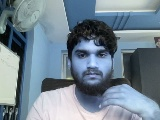

Press 'q' and Enter to exit: ··········


In [ ]:
# Your existing code for capturing the initial image
img = capture_image()

while True:
    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
    faces_in_frame = face_recognition.face_locations(imgS)
    encoded_faces = face_recognition.face_encodings(imgS, faces_in_frame)

    for encode_face, faceloc in zip(encoded_faces, faces_in_frame):
        matches = face_recognition.compare_faces(encoded_face_train, encode_face)
        faceDist = face_recognition.face_distance(encoded_face_train, encode_face)
        matchIndex = np.argmin(faceDist)
        print(matchIndex)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper().lower()
            y1, x2, y2, x1 = faceloc
            # since we scaled down by 4 times
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            #markAttendance(name)
            print(name)

    # Display the image
    _, img_encoded = cv2.imencode('.jpeg', imgS)
    img_bytes = img_encoded.tobytes()
    display(Image(data=img_bytes))

    # Break the loop if 'q' is pressed
    try:
        key = getpass.getpass("Press 'q' and Enter to exit: ")
        if key.lower() == 'q':
            break
    except KeyboardInterrupt:
        break


<IPython.core.display.Javascript object>


0: 480x640 2 faces, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face'}
orig_img: array([[[ 16,  44,  68],
        [ 41,  68,  89],
        [ 45,  67,  85],
        ...,
        [113, 131, 132],
        [110, 125, 127],
        [108, 123, 125]],

       [[ 29,  58,  79],
        [ 35,  62,  82],
        [ 44,  67,  83],
        ...,
        [111, 128, 131],
        [107, 124, 127],
        [108, 125, 128]],

       [[ 31,  61,  80],
        [ 36,  64,  81],
        [ 37,  63,  77],
        ...,
        [107, 126, 134],
        [100, 119, 127],
        [ 99, 118, 126]],

       ...,

       [[ 16,  28,  34],
        [ 23,  35,  41],
        [ 55,  65,  72],
        ...,
        [103, 105, 106],
        [ 88,  89,  93],
        [ 84,  85,  89]],

       [[ 16,  26,  33],
        [ 27,

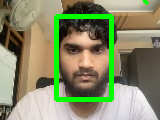

Encoded Faces: [array([   -0.16795,      0.0934,    0.051249,   -0.072463,   -0.045428,  0.00029232,   -0.050027,    0.013351,     0.14918,   -0.081512,     0.18762,   -0.018502,    -0.17035,     -0.1058,    -0.04342,    0.096339,   -0.095718,    -0.12682,   -0.081742,    -0.13546,   -0.031792,    0.071968,    0.048373,    0.011347,
           -0.1718,    -0.39394,   -0.035162,    -0.12235,   -0.058042,   -0.083668,  -0.0021321,    0.017428,    -0.19726,   -0.057564,    0.023575,     0.14525,   0.0054979,     0.02141,     0.16764,    0.002854,     -0.1036,   -0.022779,    0.059676,     0.35198,     0.15157,     0.04608,   -0.038749,    0.035617,
           0.13068,    -0.23688,     0.14307,    0.092515,     0.06332,  -0.0068309,     0.14059,    -0.04219,   -0.036663,     0.12419,    -0.13364,   0.0010479,   -0.011901,    0.018022,    -0.07409,    -0.11385,      0.2251,     0.13247,    -0.10951,   -0.064846,     0.12855,    -0.13419,    0.023888,   -0.001718,
          -0.07313,    -0.1

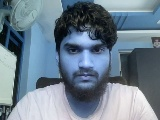

In [ ]:
img = capture_image()
img = cv2.resize(img, (0, 0), None, 0.25, 0.25)
cv2.imwrite("/content/img.jpg", img)
image_path = "/content/img.jpg"  # Specify the path to your image

# Load the image
frame = cv2.imread(image_path)

# Get the image dimensions
H, W, _ = frame.shape

# Output image path
output_image_path = '{}_out.jpg'.format(os.path.splitext(image_path)[0])

# Model path
model_path = os.path.join('/content/drive/MyDrive/imagedatasets/detect/train/weights', 'last.pt')

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

# List to store bounding box coordinates
bounding_boxes = []

# Run detection on the image
results = model(frame)[0]
print(results)
print("Class names:", results.names)

# Process the results and draw bounding boxes
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        # Draw a rectangle
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)

        # Add label with bounding box coordinates
        label = f"{results.names[int(class_id)].upper()}: ({int(x1)}, {int(y1)}) - ({int(x2)}, {int(y2)})"
        cv2.putText(frame, label, (int(x1), int(y1 - 20)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

        # Store bounding box coordinates in the list
        bounding_boxes.append((int(x1), int(y1), int(x2), int(y2)))

        print("Hey, bounding box found!")

# Save the output image
cv2.imwrite(output_image_path, frame)

# Display the output image
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Crop face regions using bounding box coordinates
for box in bounding_boxes:
    x1, y1, x2, y2 = box
    face_region = frame[y1:y2, x1:x2]

    # Convert BGR to RGB for face_recognition library
    face_region_rgb = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)

    # Perform face encoding
    encoded_faces = face_recognition.face_encodings(face_region_rgb)

    # Print or use the encoded_faces as needed
    print("Encoded Faces:", encoded_faces)








while True:

    imgS = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)

    #faces_in_frame = face_recognition.face_locations(imgS)
    #encoded_faces = face_recognition.face_encodings(imgS, faces_in_frame)

    # ... [previous code] ...

    for box in bounding_boxes:
        x1, y1, x2, y2 = box
        # Convert YOLO coordinates to face_recognition format
        top, right, bottom, left = y1, x2, y2, x1
        face_location = (top, right, bottom, left)

        # Extract the face region from the original image (not the resized one)
        face_region = img[top:bottom, left:right]
        face_region_rgb = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)

        # Perform face encoding using the specified location
        encoded_face = face_recognition.face_encodings(face_region_rgb, [face_location])
        if encoded_face:
            encoded_faces.extend(encoded_face)

    # ... [remaining code] ...

    for encode_face, faceloc in zip(encoded_faces, faces_in_frame):
        matches = face_recognition.compare_faces(encoded_face_train, encode_face)
        faceDist = face_recognition.face_distance(encoded_face_train, encode_face)
        matchIndex = np.argmin(faceDist)
        print(matchIndex)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper().lower()
            y1, x2, y2, x1 = faceloc
            # since we scaled down by 4 times
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            #markAttendance(name)
            print(name)

    # Display the image
    _, img_encoded = cv2.imencode('.jpeg', imgS)
    img_bytes = img_encoded.tobytes()
    display(Image(data=img_bytes))

    # Break the loop if 'q' is pressed
    try:
        key = getpass.getpass("Press 'q' and Enter to exit: ")
        if key.lower() == 'q':
            break
    except KeyboardInterrupt:
        break

